# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

# Описание данных

**Name** — название игры

**Platform** — платформа

**Year_of_Release** — год выпуска

**Genre** — жанр игры

**NA_sales** — продажи в Северной Америке (миллионы проданных копий)

**EU_sales** — продажи в Европе (миллионы проданных копий)

**JP_sales** — продажи в Японии (миллионы проданных копий)

**Other_sales** — продажи в других странах (миллионы проданных копий)

**Critic_Score** — оценка критиков (максимум 100)

**User_Score** — оценка пользователей (максимум 10)

**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Откроем файл с данными и изучим информацию 

In [869]:
#Сразу импортируем нужные нам для проекта библиотеки

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [870]:
#Откроем файл с данными и посмотрим первые 10 строк

data = pd.read_csv('/datasets/games.csv')

data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


## Предобработка данных

In [871]:
#Изучим информацию и посмотрим, какие проблемы нам нужно устранить

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**План действий**

1. Привести все столбцы к нижнему регистру;

2. Проверить на дубликаты;

3. Поменять типы данных;

4. Обработать пропуски.

In [872]:
#Приведем столбцы к нижнему регистру

data.columns = data.columns.str.lower()

data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [873]:
#Посмотрим на количество пропусков в каждом столбце

data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Как данные собирались из открытых источников неизвестно. Вполне вероятно, что в открытых ресурсах присутствовали не все данные и при попытке автоматичесго сбора поля заполнились пустыми значениями. Пропуск в наименовании игры может означать невозвожность кодирования на латиницу исходного наименования, либо некоректная отработка сборщика. Отсутствие пользовательских отзывов и критиков: всё вышесказанное, плюс их могло просто не быть, такое характерно для игр прошлого. Отсутствие рейтинга или tbd означает не более чем, что издатель не захотел получать рейтинговую оценку ESRB или игра не планировалась выпускаться для региона NA.

Нам нужно будет более детально рассмотреть следующие столбцы: **name, year_of_release, critic_score, user_score и rating.**

**Поработаем с неявными и явными дубликатами**

In [874]:
#Проверим количество неявных дубликатов

data.duplicated(subset=['name', 'platform']).sum()

5

Подобные дубликаты могут быть просто человеческой ошибкой при вводе данных: она могла произойти при заполнении года, жанра или т.п. Но так как имя и платформа совпадает, то это одна и таже игра, поэтому со спокойной совестью удалим эти дубликаты.

In [875]:
#Удаляем дубликаты

data = data.drop_duplicates(subset=['name', 'platform'], keep='first').reset_index(drop=True)

In [876]:
#Проверка на явные дубликаты

data.duplicated().sum()

0

Дубликатов больше не выявлено, это хорошие новости!

**Проверим пропуски и изменим типы данных.**

In [877]:
#Посмотрим значения в столбцах, чтобы в дальнейшем привести их нужному типу данных

print('Столбец year_of_release:', data['year_of_release'].unique());

print('Столбец genre:', data['genre'].unique())

print('Столбец critic_score:', data['critic_score'].unique())

print('Столбец user_score:', data['user_score'].unique())

print('Столбец rating:', data['rating'].unique())

Столбец year_of_release: [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
Столбец genre: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
Столбец critic_score: [76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]
Столбец user_score: ['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8'

**Обработаем пропуски и поменяем типы данных**

In [878]:
#Посмотрим, сколько значений Nan содержится в столбце 

data['year_of_release'].isnull().sum()

268

Удалим эти строки, так как их немного и на наш анализ они никак не повлияют.

In [879]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

In [880]:
#Поменяем тип данных столбца

data['year_of_release'] = data['year_of_release'].astype('Int64')

In [881]:
#Посмотрим пропуски в столбце critic_score

data['critic_score'].isnull().sum()

8462

Пропусков получилось довольно много. Чтобы не портить статистику, остаивим всё, как есть.

In [882]:
#Изменим тип данных

data['critic_score'] = data['critic_score'].astype('Int64')

Хотелось бы обратить внимание на аббревиатуру tbd в столбцах с рейтингом. Аббревиатура tbd значит **to be determined, to be done**. То есть, данные были нарочно не заполнены, так как не определились с рейтингом. Поэтому предлагаю заменить tbd на Nan.

In [883]:
#В столбце user_score обнаружили значение tbd, изменим его на nan

data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)

#Проверим замену значения

print('Уникальные значения:', data['user_score'].unique())

#Изменим тип данных
data['user_score'] = data['user_score'].astype(float)

Уникальные значения: ['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4'
 '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7' '4.1'
 '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3' '4.7'
 '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8' '1.8'
 '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2' '2.3'
 '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [884]:
data['user_score'].isna().sum()

8982

Пропущенных значений слишком много, поэтому данные оставим в исходном виде, в дальнейшем они нам понадобятся для анализа.

In [885]:
data['rating'].isna().sum()

6677

Пропусков оказалось немало, удалить их - значит потерять огромное количество информации, которая в дальнейшем нам может оказаться полезной. Заменим пропуски на значение Unknown.

In [886]:
data['rating'] = data['rating'].fillna('Unknown')

#Посмотрим, какие жанры и в каком количестве у нас представленыы

data['rating'].value_counts()

Unknown    6677
E          3920
T          2903
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

Смущают последние 4 рейтинга в небольшом количестве, посмотрим на расшифровку этих рейтингов.

"EC" («Early childhood») — «Для детей младшего возраста»

"E" («Everyone») — «Для всех»

"E10+" («Everyone 10 and older») — «Для всех от 10 лет и старше»

"T" («Teen») — «Подросткам»

"M" («Mature») — «Для взрослых»

"AO" («Adults Only 18+») — «Только для взрослых»

"RP" («Rating Pending») — «Рейтинг ожидается»

"K-A" - старый вариант маркировки E (for everyone)

Исходя из полученной информации, можем заменить 'RP' на 'Unknown', 'K-A' на 'E' и 'AO' на 'M', а EC оставим без изменений.

In [887]:
data['rating'] = data['rating'].replace('RP', 'Unknown')

data['rating'] = data['rating'].replace('K-A', 'E')

data['rating'] = data['rating'].replace('AO', 'M')

#Посмотрим изменения

data['rating'].value_counts()

Unknown    6678
E          3923
T          2903
M          1537
E10+       1393
EC            8
Name: rating, dtype: int64

In [888]:
#Посмотрим пропуски в столбце name

data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
652,NaN,GEN,1993,NaN,1.78,0.53,0.0,0.08,<NA>,NaN,Unknown


In [889]:
#Удалим строки из столбца name, так как никакой информативности они нам не дадут

data = data.dropna(subset=['name']).reset_index(drop=True)

Эти пропуски мы удалили, так как они не несут никакой информативности. В них отсутствуют значения практически во всех столбцах, а данные так станут только чище.

In [890]:
#Посмотрим на данные после обработки 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16441 entries, 0 to 16440
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16441 non-null  object 
 1   platform         16441 non-null  object 
 2   year_of_release  16441 non-null  Int64  
 3   genre            16441 non-null  object 
 4   na_sales         16441 non-null  float64
 5   eu_sales         16441 non-null  float64
 6   jp_sales         16441 non-null  float64
 7   other_sales      16441 non-null  float64
 8   critic_score     7980 non-null   Int64  
 9   user_score       7460 non-null   float64
 10  rating           16441 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


Посчитаем суммарные продажи во всех регионах и запишим их в новый столбец.

In [891]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

data['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16436     0.01
16437     0.01
16438     0.01
16439     0.01
16440     0.01
Name: total_sales, Length: 16441, dtype: float64

**Краткий вывод:**

Привели названия столбцов к нижнему регистру; 

Преобразовали данные в нужные типы; 

Описали, в каких столбцах заменили тип данных и почему; 

Обработали пропуски; 

Объяснили, почему заполнили пропуски определённым образом или почему не стали это делать; 

Описали причины, которые могли привести к пропускам; 

Обратили внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей;

Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

## Проведем исследовательский анализ данных

In [892]:
#Посмотрим, какой год последним представлен в данных

data['year_of_release'].max()

2016

In [893]:
#Посмотрим год, с которого начиналась вестись статистика

data[data['year_of_release'] > 1900]['year_of_release'].min()

1980

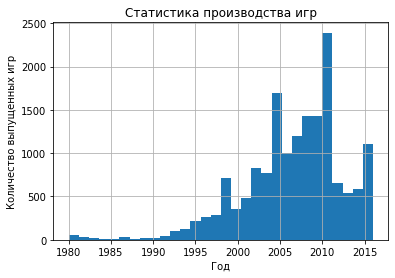

In [894]:
#Посмотрим наглядно распределение данных за все представленные года

data['year_of_release'].hist(bins =30, range=(1980, 2016))

plt.title('Статистика производства игр')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр');

Похоже, что активный период производства игр начался в 2004 году. Некоторые периоды лет рассмотрим по отдельности.

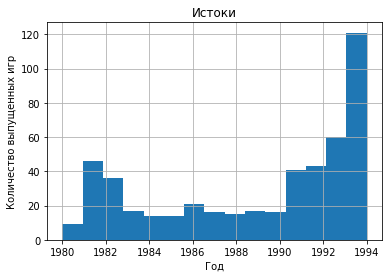

In [895]:
data['year_of_release'].hist(bins = 15, range=(1980, 1994))
plt.title('Истоки')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр');

Как можем наблюдать, с 1980 по 1994 года выпускалось меньше всего игр, эти данные нам вряд ли пригодятся для исследования.

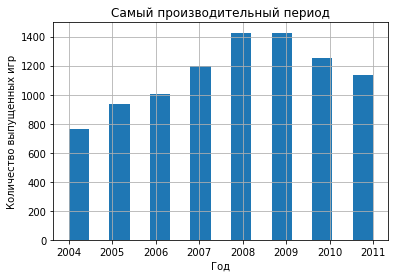

In [896]:
data['year_of_release'].hist(bins = 15, range=(2004, 2011))
plt.title('Самый производительный период')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр');

Больше всего игр выпускалось в 2008 и 2009 годах. Начиная с 2010 года, количество выпускаемых игр пошло на спад.

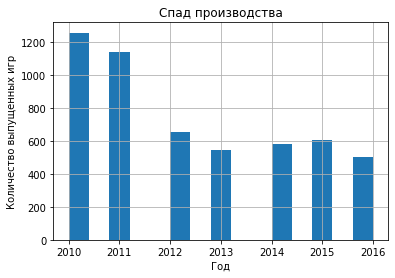

In [897]:
data['year_of_release'].hist(bins = 15, range=(2010, 2016))
plt.title('Спад производства')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр');

Начиная с 2010 года количество игр держится приблизительно на одном уровне, но пиков, какие были в период с 2004 по 2009, больше не наблюдается.

In [898]:
#Посмотрим на продажи по каждой платформе
platforms_data = (data
                  .pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
                  .sort_values(by = 'total_sales', ascending = False)
)
platforms_data

,total_sales
platform,
PS2,1233.56
X360,959.99
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [899]:
#Выделим 10 наиболее перспективных платформ и изучим их данные поближе

perspective_platforms = platforms_data.reset_index().iloc[0:10]

perspective_platforms['platform'].unique()


array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP',
       '3DS'], dtype=object)

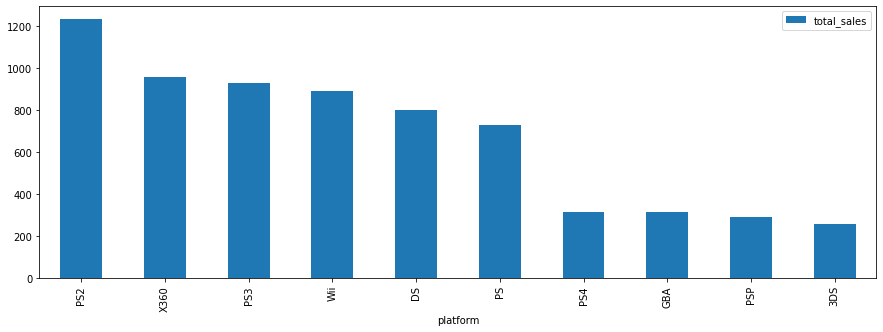

In [900]:
perspective_platforms.plot(x="platform", y="total_sales", kind='bar', figsize=(15,5));

Лидирует по количеству игр PS2, наимешее количество игр выпущено для 3DS.

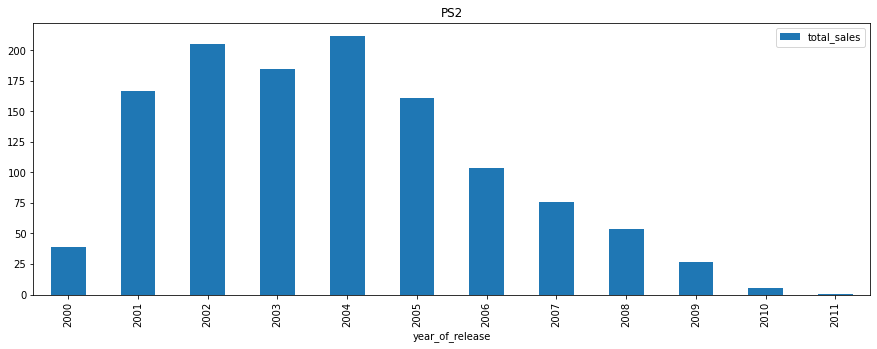

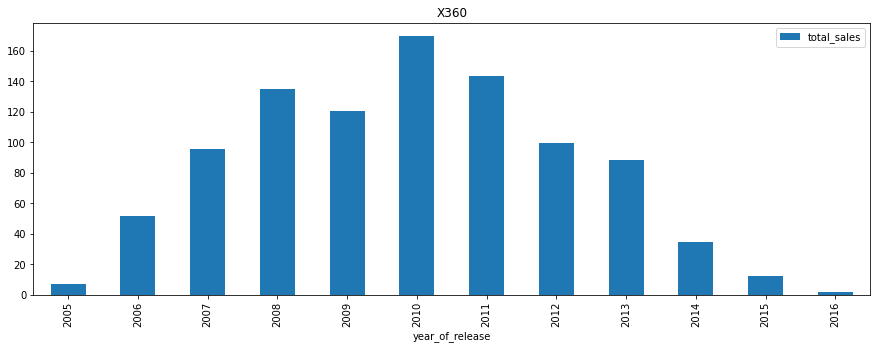

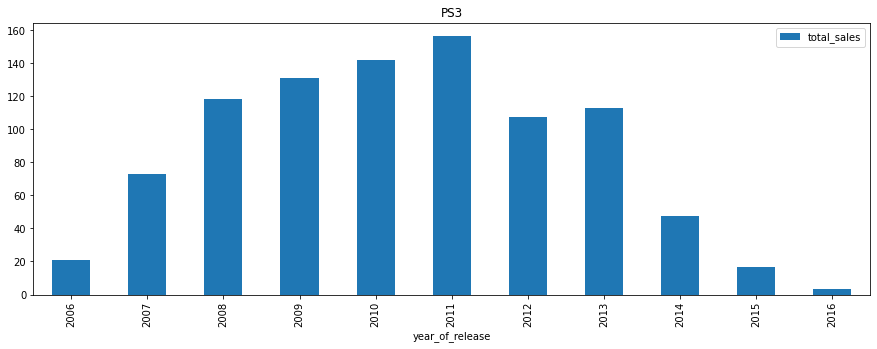

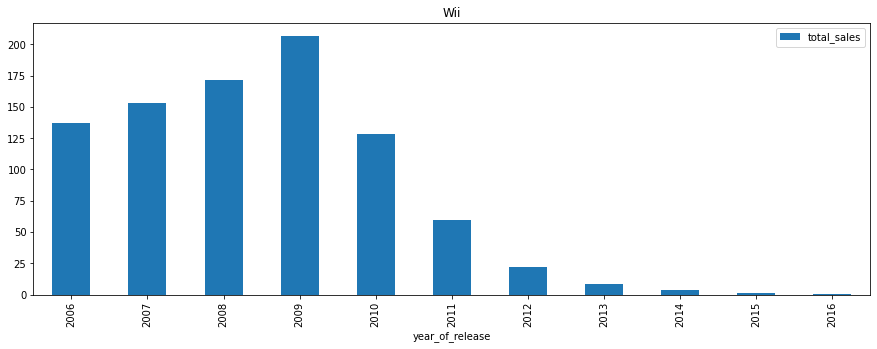

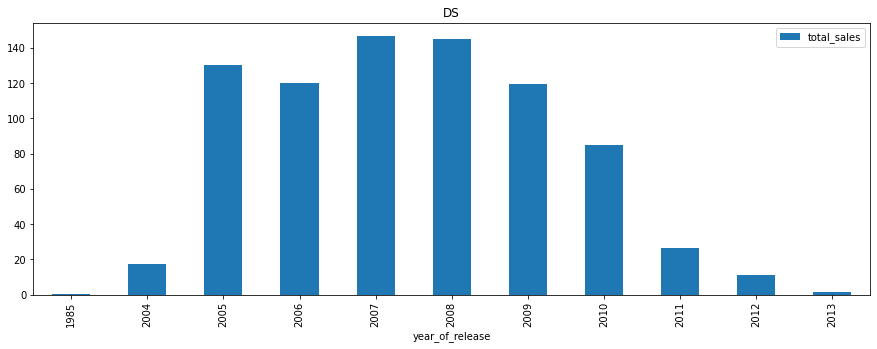

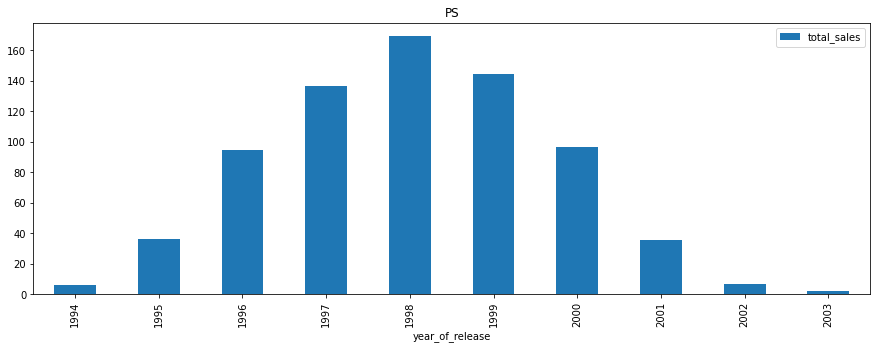

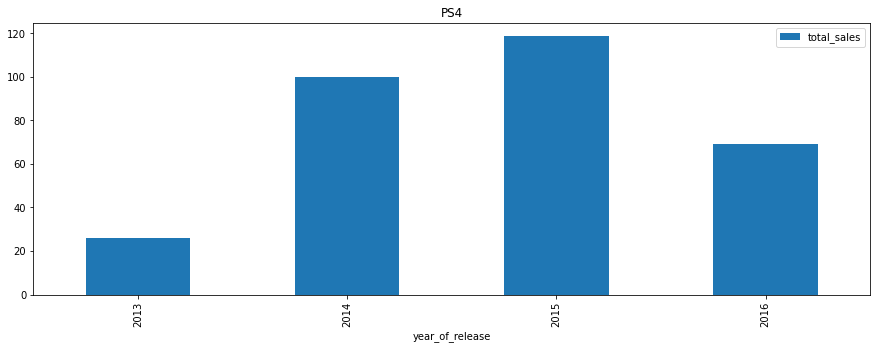

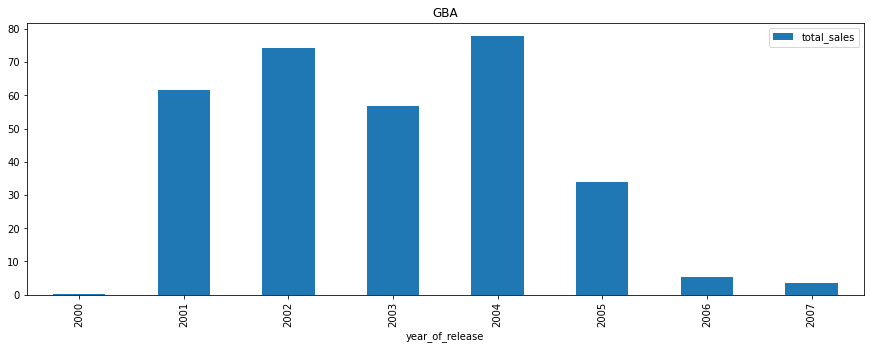

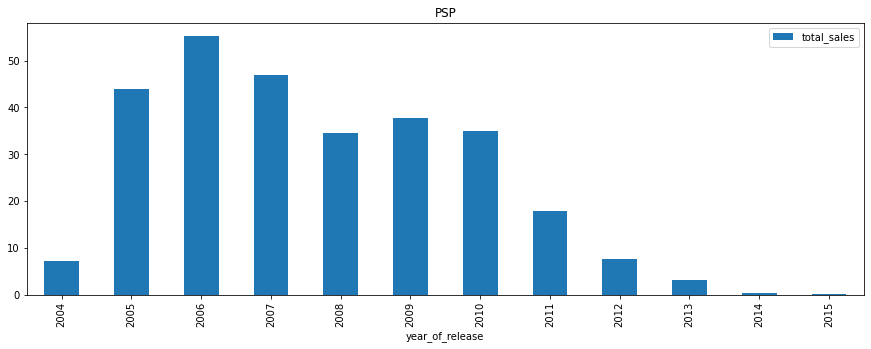

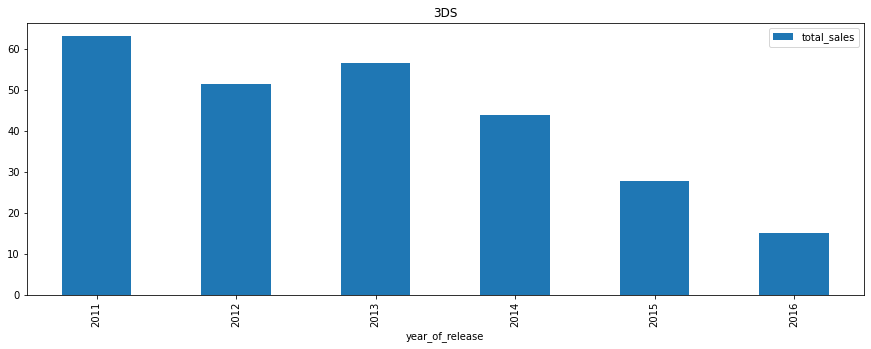

In [901]:
#Построим графики по каждой из платформ

for platform in perspective_platforms['platform']:
    data[data['platform'] == platform].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', figsize=(15,5))
    plt.title(platform)

По изученным данным можем сделать вывод, что платформа в среднем существует 10 лет. PS4 самая молодая платформа. Для анализа нам необходимы актульные данные. По-моему мнению стоит рассмотреть период с 2014 по 2016 года.

In [902]:
#Отсортируем данные по актуальному периоду

data_actual = data.query('year_of_release >= 2014')

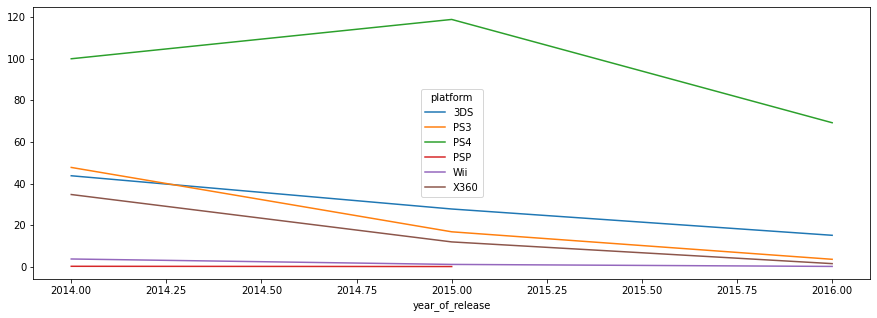

In [903]:
platforms_filtr = perspective_platforms['platform']

(data_actual
            .query('platform in @platforms_filtr')
            .pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')
            .plot(figsize=(15, 5))
);

Хотелось бы отметить PS4, так как платформа относительно молодая, продажи еще достаточно высоки, но можем заметить, что спад уже присутствует. Вторая платформа, которая привлекает внимание - 3DS.То есть потенциально прибыльными платформами можно назвать PS4 и 3DS. На остальные платформы спроса либо нет, либо он стремительно падает. К неперспективным можно отнести платформы X360, PS3, а у Wii стабильно низкие продажи.

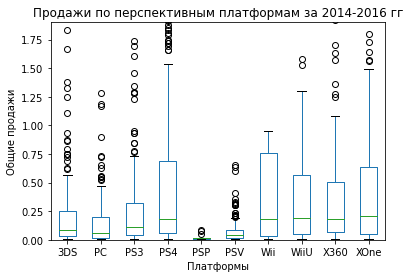

In [904]:
(data_actual
            .pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
            .plot(kind='box', ylim=(0,1.9))
)
plt.title('Продажи по перспективным платформам за 2014-2016 гг') 
plt.xlabel('Платформы') 
plt.ylabel('Общие продажи');

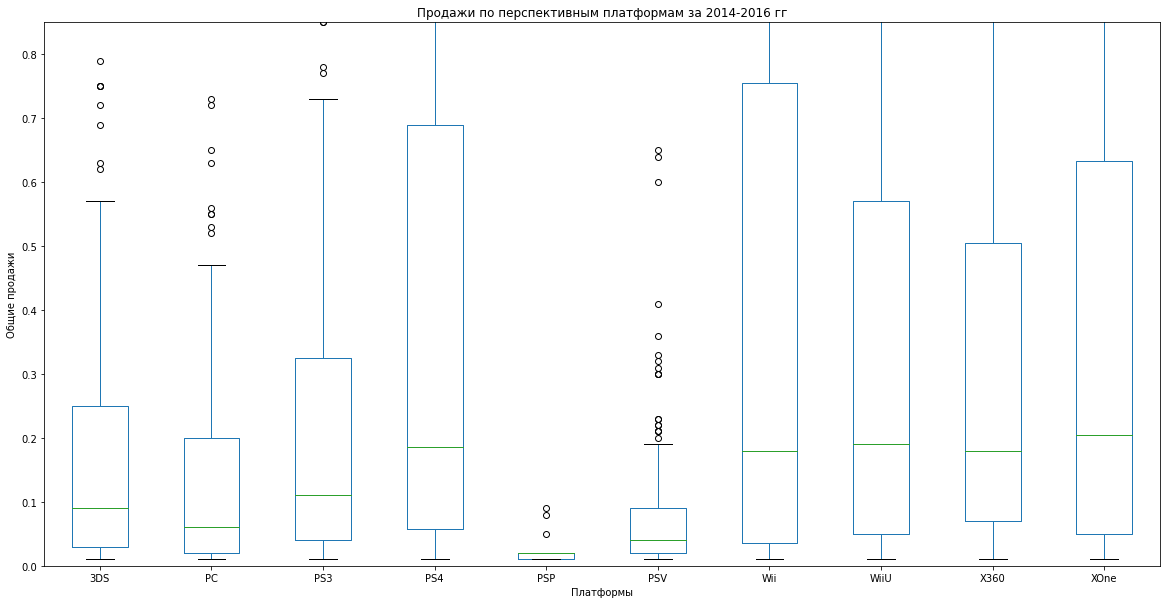

In [905]:
(data_actual
            .pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
            .plot(kind='box', ylim=(0,0.85), figsize=[20, 10])
)
plt.title('Продажи по перспективным платформам за 2014-2016 гг') 
plt.xlabel('Платформы') 
plt.ylabel('Общие продажи');

Мы можем увидеть, что в нашу сортировку не попала платформа XOne, которая только начинает набирать популярность. На нее было выпущено не так много игр, поэтому мы ее не включили в предыдущий график, но игры этой консоли очень хорошо продаются, что мы и видим по медианным значениям, которые примерно на одном уровне с PS4, так же, как и WiiU.

**Вывод:**

Потенциально прибыльные платформы - PS4, XOne и WiiU.

Расмотрим популярную платформу PS3, которая в своё время была очень популярна.

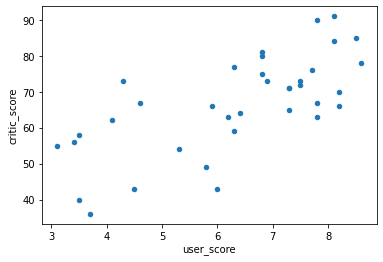

In [906]:
data_ps3 = data_actual.query('platform == "PS3"')
data_ps3.plot(x='user_score', y='critic_score', kind='scatter');

In [907]:
ps3_cor = data_ps3[['critic_score','user_score', 'total_sales']]

ps3_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.693445,0.446575
user_score,0.693445,1.000000,-0.166761
total_sales,0.446575,-0.166761,1.000000


По графику видно, что в оценки критиков и оценки пользователей приблизительно совпадают. Можем заметить зависимость между оценками критиков и продажами. Предположительно, оценки критиков могут сказываться на продажах игр.

In [908]:
#Срежем данные по каждой из платформ, которых мы отметили, как потенциально прибыльные

data_xone = data_actual.query('platform == "XOne"')

data_ps4 = data_actual.query('platform == "PS4"')

data_wiiu = data_actual.query('platform == "WiiU"')

Посмотрим линейную зависимость между оценками критиков и пользователей и продажами.

In [909]:
wiiu_cor = data_wiiu[['critic_score','user_score', 'total_sales']]

wiiu_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.763536,0.370201
user_score,0.763536,1.000000,0.407926
total_sales,0.370201,0.407926,1.000000


In [910]:
ps4_cor = data_ps4[['critic_score','user_score', 'total_sales']]

ps4_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.546434,0.402661
user_score,0.546434,1.000000,-0.040132
total_sales,0.402661,-0.040132,1.000000


In [911]:
xone_cor = data_xone[['critic_score','user_score', 'total_sales']]

xone_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.440977,0.428677
user_score,0.440977,1.000000,-0.070384
total_sales,0.428677,-0.070384,1.000000


Можем сделать вывод, что оценки критиков платформ XOne и PS4 имеют  прямую, средне-слабую корреляцию с "цифрами" продаж. Оценки пользователей корреляции с продажами не имеют. В то же время, платформа WiiU показывает другую статистику: как и оценки критиков, так и оценки пользователей имеют корреляцию с продажами.  

**Посмотрим на популярные игровые жанры по продажам**

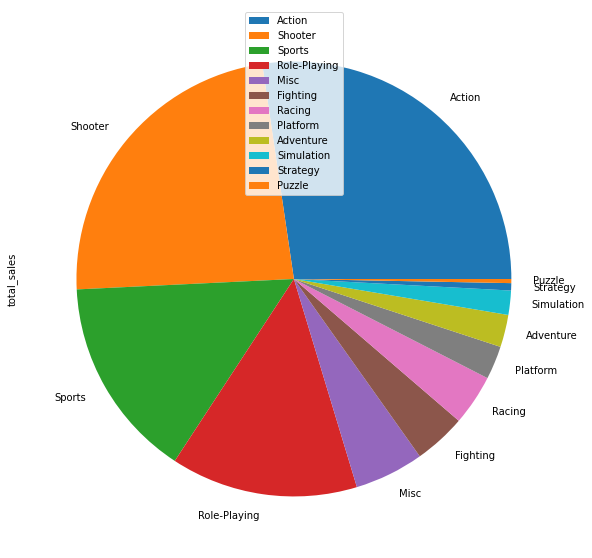

In [912]:
#Сделаем наглядную диаграмму

( data_actual
             .pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum')
             .sort_values(ascending=False, by = 'total_sales').plot(kind='pie', figsize=(10,10), y= 'total_sales')
);
plt.legend(loc=9);

In [913]:
#Посмотрим на продажи по каждому жанру, отсортируем по убыванию

(data_actual
            .pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median')
            .sort_values(ascending=False, by = 'total_sales')
)

,total_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


Можем прийти к выводу, что жанры, которые больше всего пользуются популярностью - Shooter, Sports и Platform. Меньше всего нравятся людям Puzzle и Adventure.

## Составим портрет пользователя каждого региона

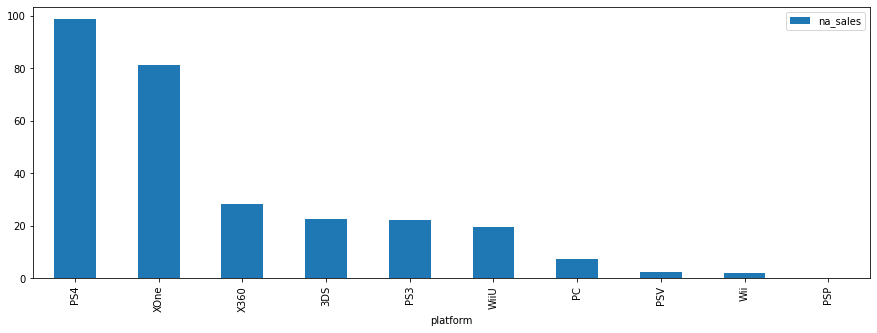

In [914]:
#Посмотрим данные по Северной Америке

(data_actual
            .pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
            .sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(15,5))
);

Пользователи Северной Америки больше всего предпочитают PS4. Платформы XOne, X360, 3DS - пользуются также значительной популярностью.

In [915]:
#Определим топ 5 платформ для Северной Америки

display(data_actual
                   .pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
                   .sort_values(ascending=False, by='na_sales')[:5]
       )

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


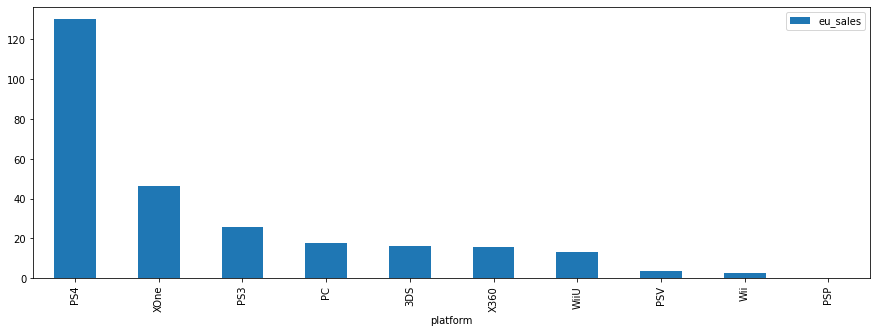

In [916]:
#Посмотрим на данные в Европе

(data_actual
            .pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
            .sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(15,5))
);


В Европе самая популярная платформа - PS4. Также значительную долю имеют платформы XOne и PS3.

In [917]:
#Определим топ 5 платформ для Европы

display(data_actual
                   .pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
                   .sort_values(ascending=False, by='eu_sales')[:5]
       )

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


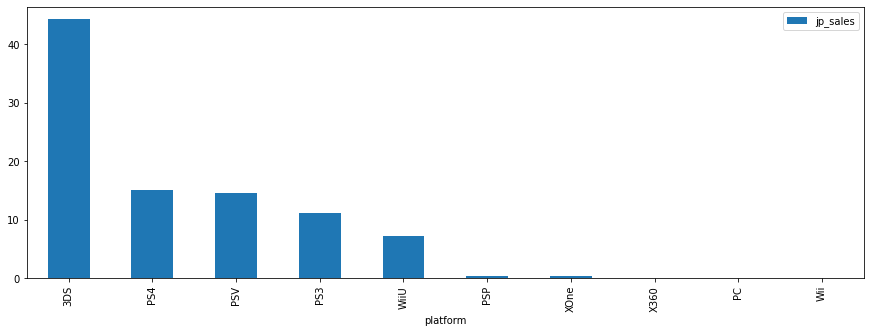

In [918]:
#Посмотрим на данные в Японии

(data_actual
            .pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
            .sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(15,5))
);

Японские предпочтения значительно отличаются от предыдщих пользователей. У них лидируюшие позиции занимает платформа 3DS. При этом популярная в других регионах X360, у японцев не в подчёте.

In [919]:
#Определим топ 5 платформ для Японии

display(data_actual
                   .pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
                   .sort_values(ascending=False, by='jp_sales')[:5]
       )

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


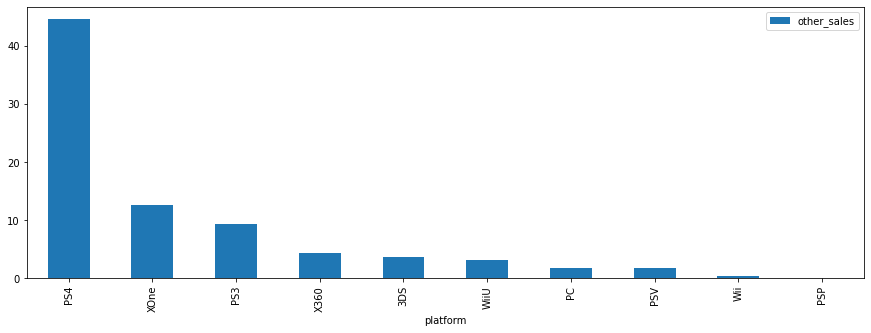

In [920]:
#Посмотрим на данные в остальных странах

(data_actual
            .pivot_table(index = 'platform', values = 'other_sales', aggfunc = 'sum')
            .sort_values(ascending=False, by = 'other_sales').plot(kind = 'bar', figsize=(15,5))
);

По остальным регионам можем сделать вывод, что их предпочтения сходятся с американцами и европейцами. 

In [921]:
#Определим топ 5 платформ для остальных стран

display(data_actual
                   .pivot_table(index = 'platform', values = 'other_sales', aggfunc = 'sum')
                   .sort_values(ascending=False, by='other_sales')[:5]
       )

,other_sales
platform,
PS4,44.48
XOne,12.52
PS3,9.37
X360,4.35
3DS,3.68


**Теперь посмотрим предпочтения жанров по каждому региону**

In [922]:
#Данные по Северной Америке

#data_actual.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales')

#Топ 5 жанров
(data_actual
            .pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')
            .sort_values(ascending=False, by = 'na_sales')[0:5]
)

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


In [923]:
#Данные по Европе

#data_actual.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales')

#Топ 5
(data_actual
            .pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')
            .sort_values(ascending=False, by = 'eu_sales')[0:5]
)

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


In [924]:
#Данные по Японии

#actual_data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales')

#Топ 5

(data_actual
            .pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')
            .sort_values(ascending=False, by = 'jp_sales')[0:5]
)

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


In [925]:
#Данные по остальным странам

#data_actual.pivot_table(index = 'genre', values = 'other_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'other_sales')

#Топ 5

(data_actual
            .pivot_table(index = 'genre', values = 'other_sales', aggfunc = 'sum')
            .sort_values(ascending=False, by = 'other_sales')[0:5]
)

,other_sales
genre,
Action,22.57
Shooter,21.53
Sports,14.36
Role-Playing,8.64
Misc,4.03


Ознакомившись поближе с данными по жанрам, можем сделать вывод, что большая часть мира отдает своё предпочтение жанру Shooter, Action и Sports. Япония снова отличилась, у неё в лидирующих позициях жанр Role-Playing, на втором месте Action. А вот популярный в остальных странах жанр Shooter в самой нижней строчке топ 5. 

**Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе**

In [926]:
esrb = data_actual.pivot_table(index = 'rating', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')
esrb

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95
Unknown,58.95,56.90,64.72


Рейтинг влияет на продажи в отдельных регионах. Можем заметить, что игры, которые популярны в Европе и Америке, совсем мало продаются в Японии. Но игры, которые не имеют рейтинга, популярны в 3 регионах. Большинство продаж (Европа и Америка) принадлежит играм с рейтингом М (то есть игры для взрослых). 

## Проверка гипотез

1 гипотеза:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2 гипотеза:

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [927]:
#Сделаем выборку по платформам

xone = data_actual[(data_actual['platform'] == 'XOne') &  (data_actual['user_score'] > 0)]['user_score']

pc = data_actual[(data_actual['platform'] == 'PC') &  (data_actual['user_score'] > 0)]['user_score']

print('Средний пользовательский рейтинг платформы Xbox One:', xone.mean())
print('Средний пользовательский рейтинг платформы PC', pc.mean())

Средний пользовательский рейтинг платформы Xbox One: 6.594545454545456
Средний пользовательский рейтинг платформы PC 6.298360655737705


H0 гипотеза утверждает, что Xbox One и PC одинаковые

H1 гипотеза утверждает, что Xbox One и PC разные

In [928]:
#Проверяем первую гипотезу

alpha = .05

results = st.ttest_ind(xone, pc, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


**Вывод**
 
 Нет оснований полагать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются.

In [929]:
action = data_actual[(data_actual['genre'] == 'Action') &  (data_actual['user_score'] > 0)]['user_score']

sports = data_actual[(data_actual['genre'] == 'Sports') &  (data_actual['user_score'] > 0)]['user_score']

print('Средний пользовательский рейтинг жанра Action:', action.mean())
print('Средний пользовательский рейтинг жанра Sports', sports.mean())

Средний пользовательский рейтинг жанра Action: 6.760606060606061
Средний пользовательский рейтинг жанра Sports 5.2251968503937


H0: Средние пользовательские рейтинги жанров Action и Sports разные

H1: Средние пользовательские рейтинги жанров Action  и Sports одинаковые

In [930]:
#Проверяем вторую гипотезу

alpha = .05

results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue > alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports разные.

H0 гипотеза - это гипотеза, которую мы хотим подтвердить, гипотеза H1 изначально противоречит гипотезе H0.

## Общий вывод

Развитие игр с 1980 года по 2000 было очень слабым. В 2000 году мы видим активный рост игр, который продолжался до 2009 года. На 2008 и 2009 год приходится пик развития индустрии компьютерных игр, значит в эти года игры производились продуктивнее всего. Начиная с 2010 года количество выпускаемых игр значительно снизилось.

**В топ 3 платформ среди продаж вошли:**

PS2 (успешен в 2002-2004 годах)

Xbox360 (успешен в 2010-2011 годах)

PS 3 (успешен в 2008-2011 годах)

При этом видно, что из представленного ТОПа все платформы уже не являются актуальными.

Новые платформы быстро набирают популярность, наращивают/удерживают ее в течение 3-4 лет и затем их продажи снижаются. В среднем, платформа живёт 10 лет.

Платформы, показывающие успешные показатели по продажам за 2014-2016 год значительно отличаются от того графика, где представлены продажи платформ за все время. Если раньше лидером по продажам был PS2, то сейчас на лидирующей строчке оказалась PS4, и почетное второе место по продажам игр за 2014-2016 год занимает XOne. PS4 и XOne являются потенциальнее остальных платформ.

**Потенциально прибыльные платформы:**

PS4

XOne

WiiU

Корреляции для PS4 (потенциально самой успешной платформы) между пользовательскими оценками и продажами нет, так как значение почти нулевое. А вот оценки критиков имеют связь с продажами игр, но о их влиянии мы можем только предполагать.

**Самые прибыльные жанры являются Shooter и Action. Значения их продаж почти доходят до 140 млн проданных копий.** 

**ТОП 3 можно отметить следующие жанры:**

Shooter

Action

Sports

**Портрет Американца**

Предпочитает консоль PS4, жанры игр, которые он предпочитает Shooter и Action, популярный рейтинг М (для взрослых).

**Портрет Европейца**

Предпочитает консоль PS4. В основном его выбор приходится на жанр Action. Рейтинг игры, как и у американца, M, смею предположить, что такие игры более зрелищные.

**Портрет Японца**

Предпочитает играть на 3DS. Любимый жанр - Role-Playing. Предпочитаемый рейтинг определить не удалось, так как больше всего продаж неопределенного рейтинга, но на втором месте рейтинг Т, который подходит для подростков.

**Проверка гипотез**

Не отвергаем гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Не отвергаем гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные.